<a href="https://colab.research.google.com/github/XuRui314/MathematicalModeling/blob/main/Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

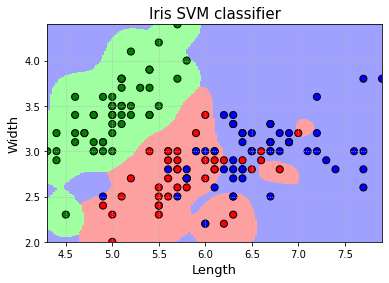

The scores of train set is 0.858333
The scores of test set is 0.833333


In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import svm  # sklearn自带SVM分类器
from sklearn import datasets # 导入数据集
from sklearn.model_selection import train_test_split
 
cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
 
 
# 导入鸢尾花（Iris）数据集
iris = datasets.load_iris()
X = iris.data  # 取数据集的特征向量
Y = iris.target  # 取数据集的标签（鸢尾花类型）
X = X[:, 0:2] # 取前两列特征向量，用来作二特征分类
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.8, random_state = 1)
 
 
# SVM 分类器
clf = svm.SVC(C = 0.8, kernel = 'rbf', gamma = 20, decision_function_shape = 'ovo')
clf.fit(x_train, y_train.ravel())
 
 
x1_min, x1_max = X[:, 0].min(), X[:, 0].max()  # 第0列的范围
x2_min, x2_max = X[:, 1].min(), X[:, 1].max()  # 第1列的范围
xx, yy = np.mgrid[x1_min:x1_max:200j, x2_min:x2_max:200j]  # 生成网格采样点
 
 
grid_test = np.stack((xx.flat, yy.flat), axis = 1)  # 测试点
grid_hat = clf.predict(grid_test) # 预测分类值
grid_hat = grid_hat.reshape(xx.shape) # 使之与输入的形状相同
 
 
plt.pcolormesh(xx, yy, grid_hat, cmap = cm_light)
plt.scatter(X[:, 0], X[:, 1], c = Y, edgecolors = 'k', s = 50, cmap = cm_dark)  # 样本
plt.scatter(x_test[:, 0], x_test[:, 1], s = 120, facecolors = 'none', zorder = 10)  # 圈中测试集样本
 
plt.xlabel('Length', fontsize = 13)
plt.ylabel('Width', fontsize = 13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title('Iris SVM classifier', fontsize = 15)
plt.grid(b = True, ls = ':')
plt.show()
 
 
# 计算准确率
print("The scores of train set is %f" %(clf.score(x_train, y_train))) # 训练集准确率
print("The scores of test set is %f" %(clf.score(x_test, y_test))) # 测试集准确率